# Import Libraries

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
global cnt 

# Import Images

In [29]:
def read_image():
    path = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/tiger.jpeg"
    img = plt.imread(path)
    grayscal = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    return img, grayscal

# Create Mask

In [30]:
def masking(img):
    r,c = img.shape
    mask = np.zeros((r,c),dtype= np.int16)
    
    for i in range(800,r-300):
        for j in range(800,c-500):
            mask[i][j] = 255
            mask[i][j] = np.bitwise_and(mask[i][j], img[i][j])        
    for i in range(200,r-400):
        for j in range(400,c-900):
            mask[i][j] = 255
            mask[i][j] = np.bitwise_and(mask[i][j], img[i][j])
    
    plt.imshow(mask,cmap = 'gray')
    plt.title("Masking......")
    
    plt.show()

# BIT slicing

In [31]:
def bitslicing(img):
    
    plt.figure(figsize=(30,30))
    r,c = grayscal.shape
   
    w = 1
    q = 1
    
    for p in range (1,9):
        slice1 = np.ones((r,c),dtype=int)
        for i in range(r):
            for j in range(c):
                x = int(grayscal[i][j])
                slice1[i][j] = x & w
                
        plt.subplot(4,4,p)
        plt.imshow(slice1,cmap = 'gray') 
        plt.title(w)
        w = w*2
        
    plt.show()
    print("shape" ,slice1.shape)    

# Filtering

In [32]:
def filtering(img):
    sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobely = np.array([[-1, -2 , -1], [0, 0 , 0], [1, 2 , 1]])
    Laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    image1 = cv.filter2D(grayscal,-1,sobelx)
    image2 = cv.filter2D(grayscal,-1,sobely)
    image3 = cv.filter2D(grayscal,-1,Laplacian)
    image4 = cv.addWeighted(image1, 0.5, image2, 0.5, 0)

    image = [image1,image2,image4,image3]
    image_title = ["Sobel-x","Sobel-y","Sobel-xy","Laplacian"]
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(image[i],cmap = 'gray')
        plt.title(image_title[i])
    plt.show()    

# Main

Image Shape (1500, 2292, 3)
(1500, 2292)
Image Shape and Size (1500, 2292) 3438000


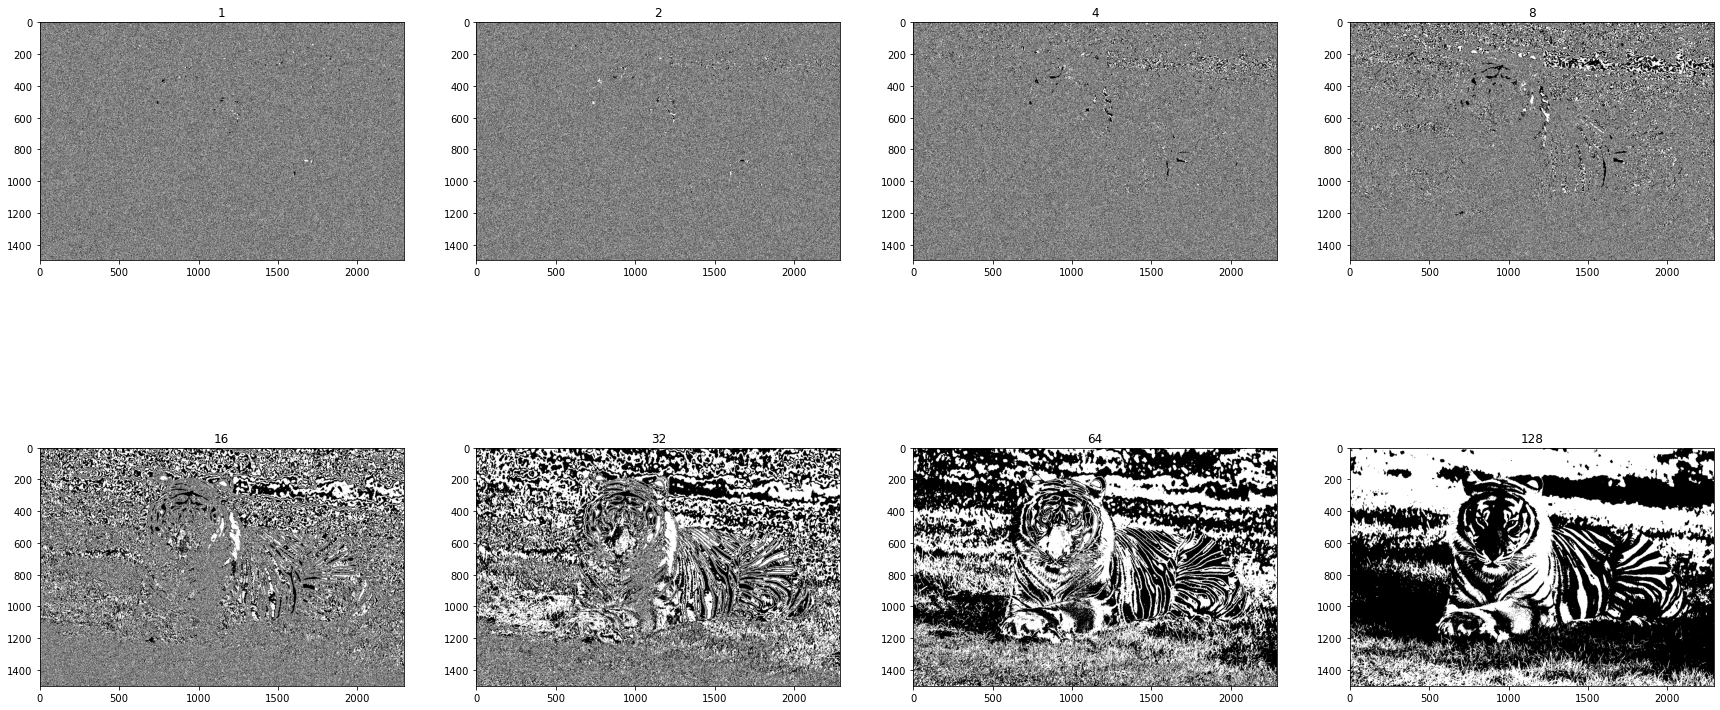

shape (1500, 2292)


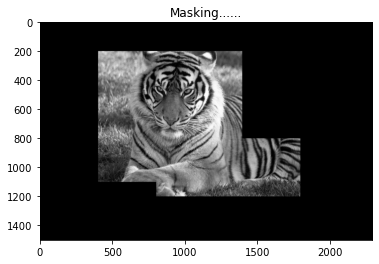

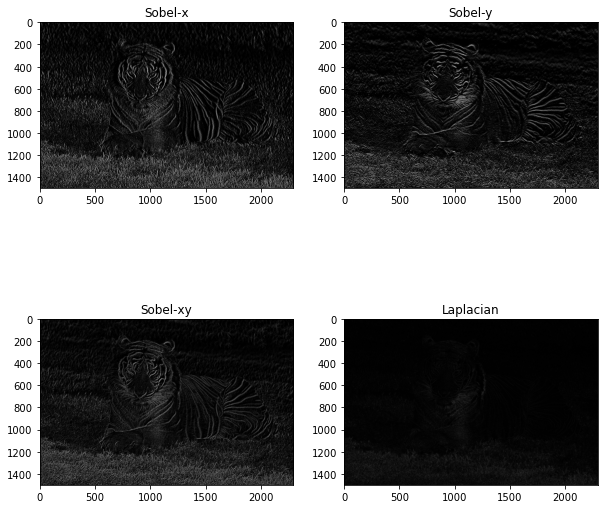

In [33]:
if __name__ == "__main__":
    img, grayscal = read_image()
    print(grayscal.shape)
    print("Image Shape and Size",grayscal.shape, grayscal.size)    
    bitslicing(grayscal)
    masking(grayscal)
    filtering(grayscal)